# Análise de Visualização de Comércio Eletrônico (Ecommerce)
- Para essa primeira etapa do projeto, irei realizar o tratamento dos dados focado em: Remoção de algumas colunas, tratamento de tipos, tratamento de nulos e tratamento de duplicados. Em cada etapa do processo, irei detalhar melhor as abordagens que tomei e o porquê;
- Qualquer sugestão para melhoria de qualquer parte desse projeto, pode entrar em contato comigo pelo LinkedIn ou email (link no perfil).

## 1.0 Bibliotecas e Leitura de Dados 📋

In [61]:
# Bibliotecas Utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Leitura e visualização dos dados originais
path = 'ecommerce_original.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Título,Nota,N_Avaliações,Desconto,Marca,Material,Gênero,Temporada,Review1,...,Nota_MinMax,N_Avaliações_MinMax,Desconto_MinMax,Preço_MinMax,Marca_Cod,Material_Cod,Temporada_Cod,Qtd_Vendidos_Cod,Marca_Freq,Material_Freq
0,0,Pijama Cirurgico Scrub Roupa Privativa Hospit...,4.0,273.0,NaN,toronto uniformes profissionais,poliéster,Sem gênero,não definido,"Preço justo , bem feito acabamento ok. Única s...",...,0.629630,0.029969,NaN,0.100645,781,122,1,1000.0,0.002274,0.117326
1,1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,4.5,3034.0,18.0,lupo,algodão,Masculino,outono/inverno,As cuecas são boas; porém você percebe na cost...,...,0.814815,0.334178,0.213115,0.378585,463,25,3,10000.0,0.042292,0.176444
2,2,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,4.7,5682.0,20.0,zorba,algodão,Masculino,não definido,O tecido é bom e são confortáveis. Só que a nu...,...,0.888889,0.625937,0.245902,0.322329,838,25,1,50000.0,0.009095,0.176444
3,3,Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...,4.6,1700.0,22.0,mash,algodão,Masculino,primavera/verão,"As cuecas são boas, porém meu marido usa g e p...",...,0.851852,0.187197,0.278689,0.372617,494,25,7,10000.0,0.010914,0.176444
4,4,Kit 3 Short Jeans Feminino Cintura Alta Barato...,4.4,507.0,9.0,menina linda,jean,Feminino,primavera/verão,Estou encantada com essas peças!.\nOs shorts s...,...,0.777778,0.055751,0.065574,0.201767,509,74,7,1000.0,0.010005,0.025466


## 2.0 Tratamento de Dados 🎲

### 2.1 Remoção de Colunas
- Nessa parte do projeto, notei que existia uma coluna de índice desnecessária, pois o Pandas cria, assim que lê seus arquivos, uma coluna exatamente igual a essa;
- Também exclui as colunas do MinMaxScaler para poder refazê-las na etapa de preparação, pois, como irei fazer diversas alterações nas colunas originais, estas serão inviesadas;
- Por conta desses pontos, decidi por excluir essas colunas, que foram relacionadas ao DataFrame ‘df_eco’ para distinção do original.

In [63]:
# Visualização das colunas existentes nos dados originais
print(df.columns.to_list())

['Unnamed: 0', 'Título', 'Nota', 'N_Avaliações', 'Desconto', 'Marca', 'Material', 'Gênero', 'Temporada', 'Review1', 'Review2', 'Review3', 'Qtd_Vendidos', 'Preço', 'Nota_MinMax', 'N_Avaliações_MinMax', 'Desconto_MinMax', 'Preço_MinMax', 'Marca_Cod', 'Material_Cod', 'Temporada_Cod', 'Qtd_Vendidos_Cod', 'Marca_Freq', 'Material_Freq']


In [64]:
# Removendo as colunas com MinMax Scaler e armazenando num novo DataFrame 'df_eco'
df_eco = df.drop(columns=['Unnamed: 0', 'Nota_MinMax', 'N_Avaliações_MinMax', 'Desconto_MinMax', 'Preço_MinMax', 'Qtd_Vendidos_Cod'])

In [65]:
# Visualização do novo DataFrame 'df_eco'
df_eco.head(2)

,Título,Nota,N_Avaliações,Desconto,Marca,Material,Gênero,Temporada,Review1,Review2,Review3,Qtd_Vendidos,Preço,Marca_Cod,Material_Cod,Temporada_Cod,Marca_Freq,Material_Freq
0,Pijama Cirurgico Scrub Roupa Privativa Hospit...,4.0,273.0,NaN,toronto uniformes profissionais,poliéster,Sem gênero,não definido,"Preço justo , bem feito acabamento ok. Única s...","Tamanho bom, costuras de qualidade, porém teci...","Muito bom, só poderia ter os cortes na lateral...",+1000,69.90,781,122,1,0.002274,0.117326
1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,4.5,3034.0,18.0,lupo,algodão,Masculino,outono/inverno,As cuecas são boas; porém você percebe na cost...,"Pelo preço promocional, com ctz tem algum defe...","Serviram muito bem, porém é nítido que o pano ...",+10mil,232.89,463,25,3,0.042292,0.176444


### 2.2 Tratamento de Tipos

In [66]:
# Verificação dos tipos de cada coluna dos dados
df_eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Título         2199 non-null   object 
 1   Nota           1559 non-null   float64
 2   N_Avaliações   1559 non-null   float64
 3   Desconto       874 non-null    float64
 4   Marca          2199 non-null   object 
 5   Material       1332 non-null   object 
 6   Gênero         2120 non-null   object 
 7   Temporada      2199 non-null   object 
 8   Review1        1515 non-null   object 
 9   Review2        1354 non-null   object 
 10  Review3        1233 non-null   object 
 11  Qtd_Vendidos   2199 non-null   object 
 12  Preço          1964 non-null   float64
 13  Marca_Cod      2199 non-null   int64  
 14  Material_Cod   2199 non-null   int64  
 15  Temporada_Cod  2199 non-null   int64  
 16  Marca_Freq     2199 non-null   float64
 17  Material_Freq  1332 non-null   float64
dtypes: float

#### 2.2.1 Tratamento da coluna 'Qtd_Vendidos'
- Minha ideia de tratamento para essa coluna foi transformar em inteiro para poder fazer análises futuras;
- Para isso, removi o '+', substitui 'mil' por '000' e 'Nenhum' por '0', para depois tranformá-los em inteiro; 
- Quando terminei meu trabalho, notei que já existia uma coluna com essas informações, a 'Qtd_Vendidos_Cod', porém com o tipo *float*. Dessa forma, decidi por excluir essa coluna lá cima também para deixar somente a que eu havia tratado.

In [67]:
# Visualização de dados unicos de 'qtd_vendidos'
df_eco['Qtd_Vendidos'].drop_duplicates()

0       +1000
1      +10mil
2      +50mil
5        +100
7         +50
8        +500
14     Nenhum
15          2
20         +5
30      +5mil
32          3
74        +25
81          1
194         4
Name: Qtd_Vendidos, dtype: object

In [68]:
# Tratamento da coluna 'qtd_vendidos'
df_eco['Qtd_Vendidos'] = df_eco['Qtd_Vendidos'].str.replace('+','').str.replace('mil','000').str.replace('Nenhum', '0').astype(int)

In [69]:
# Verificação das substituições e transformação de tipo
df_eco['Qtd_Vendidos'].drop_duplicates()

0       1000
1      10000
2      50000
5        100
7         50
8        500
14         0
15         2
20         5
30      5000
32         3
74        25
81         1
194        4
Name: Qtd_Vendidos, dtype: int64

### 2.3 Tratamento de Nulos
- Logo de cara, vemos uma quantidade bem grande de dados nulos em diversas colunas, sendo sua maior quantidade presente no campo ‘Desconto’, com 1325 registros nulos;
- Como cada um dos elementos tem sua importância, não posso simplesmente excluir tudo. Por isso, farei o tratamento de acordo com o contexto do campo. Por exemplo, em Desconto, faria sentido que os dados nulos presentes nele seja porque não houve desconto. Nesse caso, se o tipo dele é float, seria interessante substituir os dados nulos por 0.0, o que caracterizaria uma não inclusão de desconto naquela compra;
- Cada campo terá seu tratamento específico, por isso, em cada etapa irei detalhar melhor a abordagem que tomei.

In [70]:
# Quantidade de Nulos do DataFrame
df_eco.isna().sum()

Título              0
Nota              640
N_Avaliações      640
Desconto         1325
Marca               0
Material          867
Gênero             79
Temporada           0
Review1           684
Review2           845
Review3           966
Qtd_Vendidos        0
Preço             235
Marca_Cod           0
Material_Cod        0
Temporada_Cod       0
Marca_Freq          0
Material_Freq     867
dtype: int64

In [71]:
# Quantidade de nulos do DataFrame em porcentagem:
nulos_contagem = df_eco.isna().sum() # Conta o número de valores nulos em cada coluna

total_registros = len(df_eco) # Calcula o total de registros no DataFrame

porcentagem_nulos = (nulos_contagem / total_registros) * 100 # Calcula a porcentagem de valores nulos

print('Porcentagem de nulos totais:\n{}'.format(porcentagem_nulos)) # Exibe a porcentagem de valores nulos para cada coluna

Porcentagem de nulos totais:
Título            0.000000
Nota             29.104138
N_Avaliações     29.104138
Desconto         60.254661
Marca             0.000000
Material         39.427012
Gênero            3.592542
Temporada         0.000000
Review1          31.105048
Review2          38.426558
Review3          43.929059
Qtd_Vendidos      0.000000
Preço            10.686676
Marca_Cod         0.000000
Material_Cod      0.000000
Temporada_Cod     0.000000
Marca_Freq        0.000000
Material_Freq    39.427012
dtype: float64


#### 2.3.1 Tratamento de 'Nota'
- Meu primeiro pensamento ao ver dados nulos em notas é que poderia ser 0, mas não, isso seria dizer que as pessoas não gostaram nem um pouco do produto e não sabemos nisso. Também pensei em preencher com a média, mas também seria impreciso, pois não temos como saber exatamente o porquê de não terem preenchido esse campo na hora da avaliação e, por isso, seria uma presunção;
-  Por isso, a abordagem que pensei nesse caso seria preencher esses registros nulos pela mediana deles, pois excluí-los reduziria drasticamente nossos dados. Então, como esses dados são importantes, utilizar a mediana deles para suprir essa falta seria uma abordagem interessante, uma vez que a quantidade de registros totais já é bastante pequena e ainda teremos diversos tratamentos posteriores que o reduzirão ainda mais. 

In [72]:
# Tratamento de nulos na coluna 'Nota' pela mediana da Nota
mediana = df_eco['Nota'].median()
df_eco['Nota'] = df_eco['Nota'].fillna(mediana)

#### 2.3.2 Tratamento de 'N_Avaliações'
- Nesse caso, eu posso crer que quando não temos número de avaliações, quer dizer que ela é igual a 0, ou seja, não tem avaliações desse produto;
- Então fica bem simples, pois pode-se somente substituir os valores nulos por 0 para informar isso.

In [73]:
# Tratamento de nulos na coluna 'n_avaliações' para 0
df_eco['N_Avaliações'] = df_eco['N_Avaliações'].fillna(0)

#### 2.3.3 Tratamento de Desconto
- Como falei anteriormente, a ausência de registro nesse campo significaria que não houve desconto, ou seja, desconto = 0.

In [74]:
# Tratamento de nulos na coluna 'Desconto' para 0
df_eco['Desconto'] = df_eco['Desconto'].fillna(0)

#### 2.3.4 Tratamento de 'Material'
- Antes de verificar qual a melhor abordagem para os registros nulos nesse campo, eu verifiquei do que ele se trata, sendo a categoria do material daquele produto. Com isso, acredito que a ausência de um material seria, então, desconhecido ou indeterminado.

In [75]:
df_eco['Material'].drop_duplicates()

0                              poliéster
1                                algodão
4                                   jean
5                        termico unissex
6                       algodao/elastano
                      ...               
2116                 50% algodão 50% pet
2163           roupa balada festas noite
2172    jeans poliéster algodão elastano
2179           95% algodão e 5% elastano
2188                 algodão e poliéster
Name: Material, Length: 179, dtype: object

In [76]:
# Tratamento de nulos na coluna 'Material' para 'Inteterminado'
df_eco['Material'] = df_eco['Material'].fillna('Indeterminado')

#### 2.3.5 Tratamento de 'Gênero'
- Primeiro verifiquei qual os registros únicos e notei que existia uma categoria ‘Sem gênero’ que se encaixaria nesse contexto. Por isso, fiz o tratamento de nulos substituindo para essa categoria porque esse campo possui uma porcentagem bem baixa de registros nulos (4%) e fazendo isso, não influenciaria tanto, afinal, se não tem registro de gênero, muito provavelmente ele não é necessário para aquele contexto.

In [77]:
df_eco['Gênero'].drop_duplicates()

0                              Sem gênero
1                               Masculino
4                                Feminino
5                     Sem gênero infantil
10                                Meninas
12                                  Bebês
23                                Meninos
26                                    NaN
753                               Unissex
765        short menina verao look mulher
783                                Mulher
935     roupa para gordinha pluss P ao 52
1137                               menino
2163    bermuda feminina brilho Blogueira
Name: Gênero, dtype: object

In [78]:
# Tratamento de nulos na coluna 'Gênero' para 'Sem gênero'
df_eco['Gênero'] = df_eco['Gênero'].fillna('Sem gênero')

#### 2.3.6 Tratamento de 'Reviews'
- Pegando a lógica de Gênero, se não existe registro de review, quer dizer que o cliente não deixou um comentário. Por isso, podemos substituir essa ausência por ‘Sem comentários’, por exemplo.

In [79]:
# Tratamento de nulos na coluna 'Review1' para 'Sem comentários'
df_eco['Review1'] = df_eco['Review1'].fillna('Sem comentários')
df_eco['Review2'] = df_eco['Review2'].fillna('Sem comentários')
df_eco['Review3'] = df_eco['Review3'].fillna('Sem comentários')

#### 2.3.7 Tratamento de 'Preço'
- Esse tratamento vai ser o mais complicado, pois todos os produtos deveriam ter preço. Então, se não tem preço, o que aconteceu? Provavelmente foi erro de extração, mas não podemos colocar ‘Não informado’ por exemplo, porque esse campo é do tipo *float* e esse tratamento iria ir contra isso. Também não podemos fazer uma aproximação (usando alguma medida estatística) dele, pois iria ser provavelmente diferente do preço real e esse campo é muito importante. O que não seria o caso se fosse a idade (e não usaríamos esse campo pra análise, por exemplo), mas o preço será utilizado posteriormente, então provavelmente eu irei desconsiderar eles da minha análise;
- E pensando sobre isso, se eu vou desconsiderar esses registros da minha análise, não seria melhor excluí-los? Bom, ele representa 11% dos dados, o que é mediano, mas, como falei, esses dados são importantes e insubstituíveis, portanto, é uma abordagem interessante (se tiver uma sugestão melhor, eu adoraria ouvir!).

In [80]:
df_eco[df_eco['Preço'].isna()].head()

,Título,Nota,N_Avaliações,Desconto,Marca,Material,Gênero,Temporada,Review1,Review2,Review3,Qtd_Vendidos,Preço,Marca_Cod,Material_Cod,Temporada_Cod,Marca_Freq,Material_Freq
6,Calça Jeans Levis 511 Original Slim Fit Elastano,4.9,14.0,0.0,levi's,algodao/elastano,Masculino,outono/inverno,Excelente calça! melhor calça que já comprei!.,"Ótimo produto, perfeito, tudo dentro do descri...","Linda, veste perfeitamente no corpo!.",100,NaN,436,24,3,0.009095,0.000910
8,Calça Levis Jeans Masculina Tradicional Elasta...,4.3,52.0,0.0,levi's,algodão e elastano,Masculino,outono/inverno,Etiquetas e adesivos condizem com uma legítima...,Caimento bom. As etiquetas e impressões na par...,Tenho duvidas se é original. Jeans muito fino....,500,NaN,436,31,3,0.009095,0.000910
13,Calça Levis Jeans Masculina Tradicional Elasta...,4.7,12.0,0.0,levi's,algodão e elastano,Masculino,outono/inverno,Produto de excelente qualidade e dentro das es...,Ótimo produto qualidade levi's.,Excelente!!.,50,NaN,436,31,3,0.009095,0.000910
15,Bermuda Camuflada Poly Ripstop 6 Bolsos Safo...,4.6,0.0,0.0,safo,poly rip stop,Masculino,não definido,Sem comentários,Sem comentários,Sem comentários,2,NaN,685,128,1,0.002274,0.002274
58,Calça Jeans Levis 511 Original Slim Fit Elastano,5.0,3.0,0.0,levi's,algodao/elastano,Masculino,outono/inverno,Uns dos melhores produtos.,Sem comentários,Sem comentários,5,NaN,436,24,3,0.009095,0.000910


In [81]:
# Tratamento da coluna 'Preço' para excluir os registros nulos
df_eco = df_eco.dropna(subset=['Preço'])

#### 2.3.8 Tratamento de 'Material_Freq'
- Esse campo representa a frequência das categorias de Material nos dados. Ela tem a mesma porcentagem de dados nulos que Material, o que leva a crer que foi criada enquanto os dados de Material contia nulos. Com isso, eu vou excluir ele agora e refazê-lo na etapa de preparação.

In [82]:
df_eco.drop(columns='Material_Freq', inplace=True)

### 2.4 Tratamento de Duplicados
- Com esse tratamento, notamos que 201 registros foram excluídos por estarem duplicados. Como não temos algum dado que necessariamente precisa ser único para ser válido (como um registro de clientes por CPF), esse tratamento será feito em toda base de dados e o Python irá fazer seu critério para duplicidade. 

In [83]:
print('Quantidade de registros atual:', len(df_eco))

Quantidade de registros atual: 1964


In [84]:
df_eco.drop_duplicates(inplace=True)

In [85]:
print('Quantidade de registros sem duplicados:', len(df_eco))

Quantidade de registros sem duplicados: 1763


In [86]:
print('Quantidade de dados nulos:', 1964 - 1763)

Quantidade de dados nulos: 201


### 2.5 Visualização de Outliers (EXTRA)
- A partir do gráfico, podemos visualizar que as variáveis numéricas de Nota, N_Avaliações, Desconto e Preço estão com bastante valores discrepantes;
- Porém isso é o esperado, já que são registro de produtos e alguns produtos podem ser mais populares que outros, e, por isso, terem uma nota maior, um desconto maior ou um preço maior. Por causa disso, não irei fazer o tratamento dessas outliers, mas deixarei aqui a nível de conhecimento (e como exemplo de como fazer esse tipo de gráfico comparativo). 

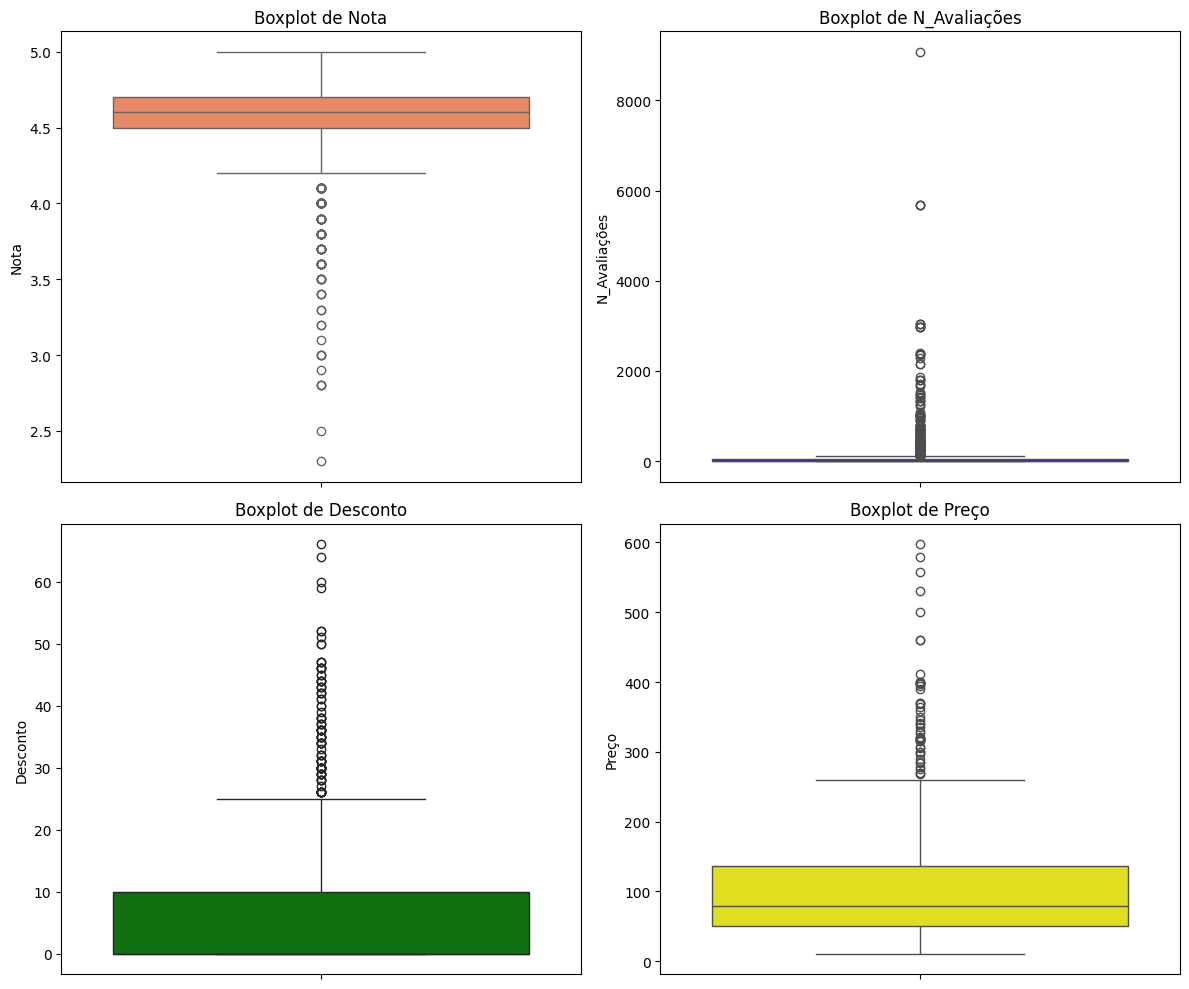

In [87]:
# Selecionando capos utilizados no grafico
colunas = ['Nota', 'N_Avaliações', 'Desconto', 'Preço']
df_grafico = df_eco[colunas]

# Criando figura
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Criando uma paleta de cores
cores = ['coral', 'blue', 'green', 'yellow']

# Iterando sobre as colunas e eixos
for i, coluna in enumerate(colunas):
    # Acessando o eixo correto na grid
    ax = axes[i // 2, i % 2]
    # Criando o boxplot no eixo específico + adição de cores
    sns.boxplot(data=df_grafico[coluna], ax=ax, color=cores[i])
    # Definindo o título para cada gráfico
    ax.set_title(f'Boxplot de {coluna}')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

### 2.6 Verificando e Salvando os Dados Tratados

In [88]:
print('Quantidade de Registros Originais:', len(df))
print('Quantidade de Registros com Tratamento:', len(df_eco))
print('Quantidade de Colunas Originais:', df.shape[1])
print('Quantidade de Colunas com Tratamento:', df_eco.shape[1])
print('Nomes das Colunas Usadas:\n{}'.format(df_eco.columns.to_list()))
print('Quantidade de Nulos:\n{}'.format(df_eco.isna().sum()))
print('Quantidade de Duplicados:', df_eco.duplicated().sum())

Quantidade de Registros Originais: 2199
Quantidade de Registros com Tratamento: 1763
Quantidade de Colunas Originais: 24
Quantidade de Colunas com Tratamento: 17
Nomes das Colunas Usadas:
['Título', 'Nota', 'N_Avaliações', 'Desconto', 'Marca', 'Material', 'Gênero', 'Temporada', 'Review1', 'Review2', 'Review3', 'Qtd_Vendidos', 'Preço', 'Marca_Cod', 'Material_Cod', 'Temporada_Cod', 'Marca_Freq']
Quantidade de Nulos:
Título           0
Nota             0
N_Avaliações     0
Desconto         0
Marca            0
Material         0
Gênero           0
Temporada        0
Review1          0
Review2          0
Review3          0
Qtd_Vendidos     0
Preço            0
Marca_Cod        0
Material_Cod     0
Temporada_Cod    0
Marca_Freq       0
dtype: int64
Quantidade de Duplicados: 0


In [60]:
df_eco.head()

,Título,Nota,N_Avaliações,Desconto,Marca,Material,Gênero,Temporada,Review1,Review2,Review3,Qtd_Vendidos,Preço,Marca_Cod,Material_Cod,Temporada_Cod,Marca_Freq
0,Pijama Cirurgico Scrub Roupa Privativa Hospit...,4.0,273.0,0.0,toronto uniformes profissionais,poliéster,Sem gênero,não definido,"Preço justo , bem feito acabamento ok. Única s...","Tamanho bom, costuras de qualidade, porém teci...","Muito bom, só poderia ter os cortes na lateral...",1000,69.90,781,122,1,0.002274
1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,4.5,3034.0,18.0,lupo,algodão,Masculino,outono/inverno,As cuecas são boas; porém você percebe na cost...,"Pelo preço promocional, com ctz tem algum defe...","Serviram muito bem, porém é nítido que o pano ...",10000,232.89,463,25,3,0.042292
2,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,4.7,5682.0,20.0,zorba,algodão,Masculino,não definido,O tecido é bom e são confortáveis. Só que a nu...,Vendo comentários de outros consumidores vejo ...,"Produto não é nem de longe original, tecido gr...",50000,199.90,838,25,1,0.009095
3,Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...,4.6,1700.0,22.0,mash,algodão,Masculino,primavera/verão,"As cuecas são boas, porém meu marido usa g e p...","E o tamanho certo, mas em baixo dela, fica mui...",Produto não parece.\nOriginal e veio 2 modelos...,10000,229.39,494,25,7,0.010914
4,Kit 3 Short Jeans Feminino Cintura Alta Barato...,4.4,507.0,9.0,menina linda,jean,Feminino,primavera/verão,Estou encantada com essas peças!.\nOs shorts s...,"Recomendo, tecido confortável, igual a foto.","Gostei muito dos shorts, material bom, para us...",1000,129.20,509,74,7,0.010005


In [29]:
# Salvando dados tratados
df_eco.to_csv('ecommerce_tratado.csv', index=False)